In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the training data
train_data = pd.read_csv('train_data.csv')

In [3]:
# Display basic information about the dataset
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Engine id              9909 non-null   int64  
 1   Cycle number           9909 non-null   int64  
 2   Operation Condition 1  9909 non-null   float64
 3   Operation Condition 2  9909 non-null   float64
 4   Operation Condition 3  9909 non-null   float64
 5   T2                     9909 non-null   float64
 6   T24                    9909 non-null   float64
 7   T30                    9909 non-null   float64
 8   T50                    9909 non-null   float64
 9   P2                     9909 non-null   float64
 10  P15                    9909 non-null   float64
 11  P30                    9909 non-null   float64
 12  Nf                     9909 non-null   float64
 13  Nc                     9909 non-null   float64
 14  epr                    9909 non-null   float64
 15  Ps30

In [4]:
# Display descriptive statistics
print(train_data.describe())

         Engine id  Cycle number  Operation Condition 1  \
count  9909.000000   9909.000000            9909.000000   
mean     25.144515    102.525280               0.000030   
std      14.748925     62.324521               0.002192   
min       1.000000      1.000000              -0.008600   
25%      12.000000     50.000000              -0.001400   
50%      25.000000    100.000000               0.000100   
75%      38.000000    150.000000               0.001500   
max      50.000000    287.000000               0.008300   

       Operation Condition 2  Operation Condition 3            T2  \
count            9909.000000                 9909.0  9.909000e+03   
mean                0.000003                  100.0  5.186700e+02   
std                 0.000294                    0.0  5.548198e-11   
min                -0.000600                  100.0  5.186700e+02   
25%                -0.000300                  100.0  5.186700e+02   
50%                 0.000000                  100.0  5

In [5]:
# Check for missing values
print(train_data.isnull().sum())

Engine id                0
Cycle number             0
Operation Condition 1    0
Operation Condition 2    0
Operation Condition 3    0
T2                       0
T24                      0
T30                      0
T50                      0
P2                       0
P15                      0
P30                      0
Nf                       0
Nc                       0
epr                      0
Ps30                     0
phi                      0
NRf                      0
NRc                      0
BPR                      0
farB                     0
htBleed                  0
Nf_dmd                   0
PCNfR_dmd                0
W31                      0
W32                      0
dtype: int64


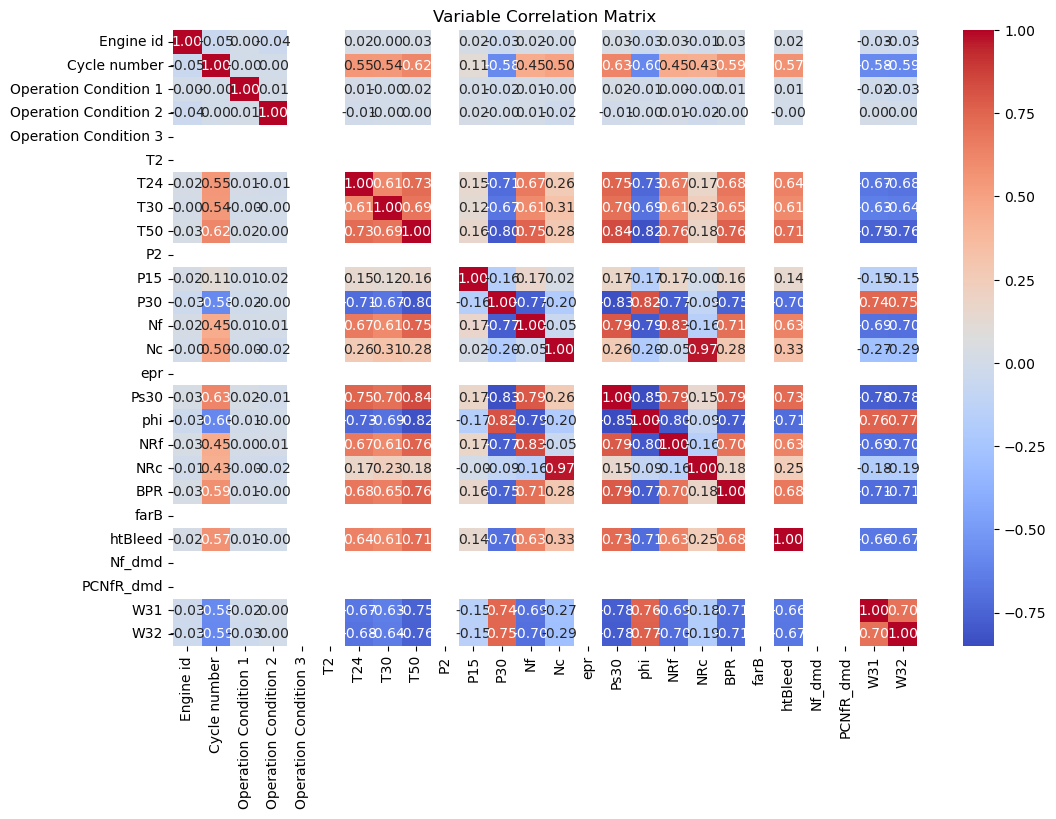

In [118]:
# Correlation Analysis
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Variable Correlation Matrix')
plt.show()

In [21]:
# Select relevant columns
sensor_columns = train_data.columns[5:]

In [22]:
# Standardize the data
scaler = StandardScaler()
train_data_standardized = pd.DataFrame(scaler.fit_transform(train_data[sensor_columns]), columns=sensor_columns)

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
# Apply ARIMA to each sensor to identify significant sensors
significant_sensors = []
for sensor in sensor_columns:
    model = ARIMA(train_data_standardized[sensor], order=(1, 1, 1))
    results = model.fit()
    if abs(results.params[1]) > 0.1:  # Adjust threshold as needed
        significant_sensors.append(sensor)

C:\Users\prach\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\prach\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\prach\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\prach\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\prach\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

In [25]:
print("Significant Sensors:", significant_sensors)

Significant Sensors: ['T24', 'T30', 'T50', 'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']


In [26]:
# Check the consistency of cycles at and near the failure cycle
engine_failure_cycles = train_data.groupby('Engine id')['Cycle number'].max()

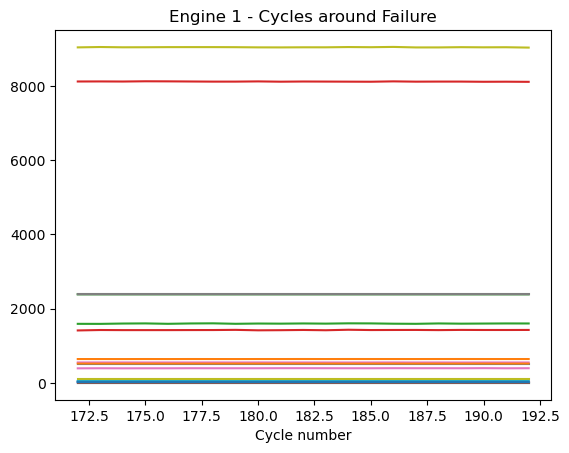

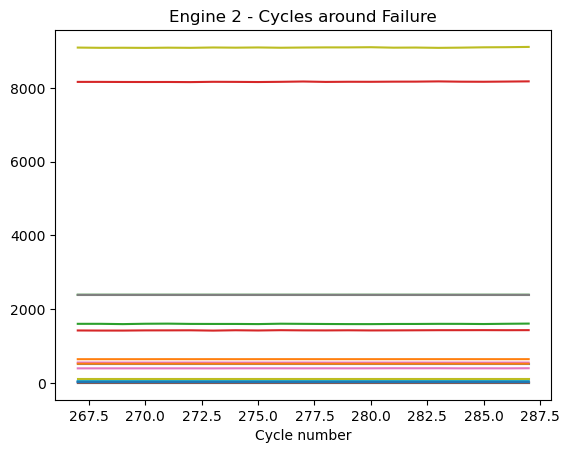

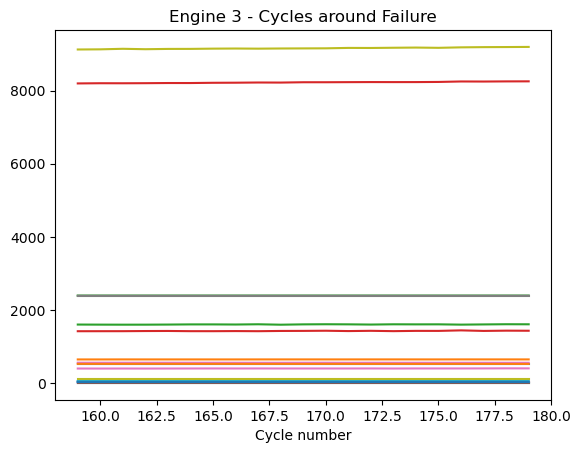

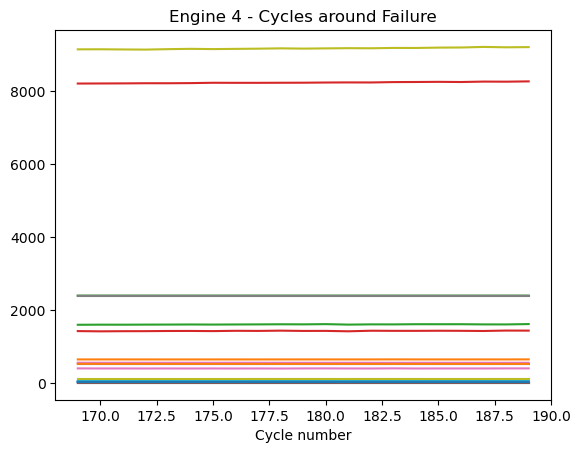

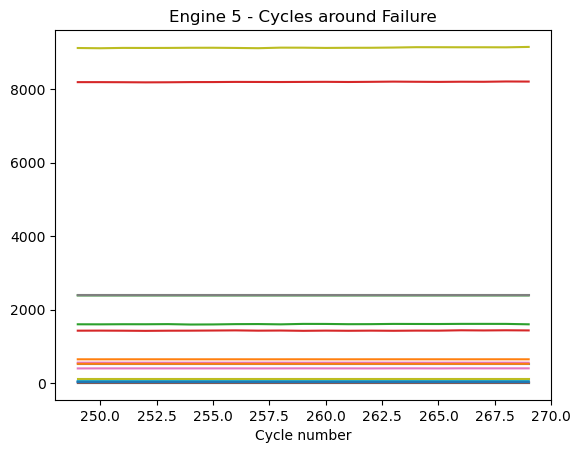

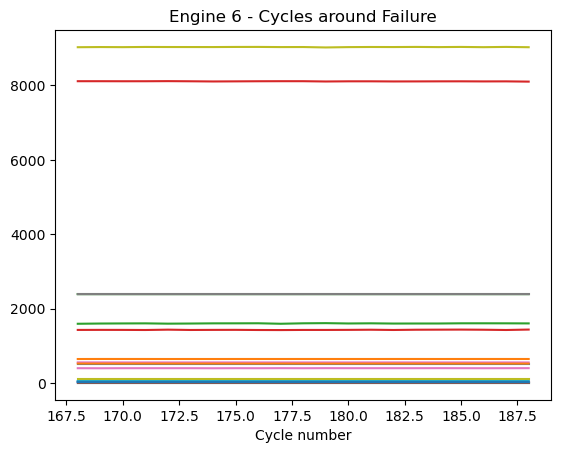

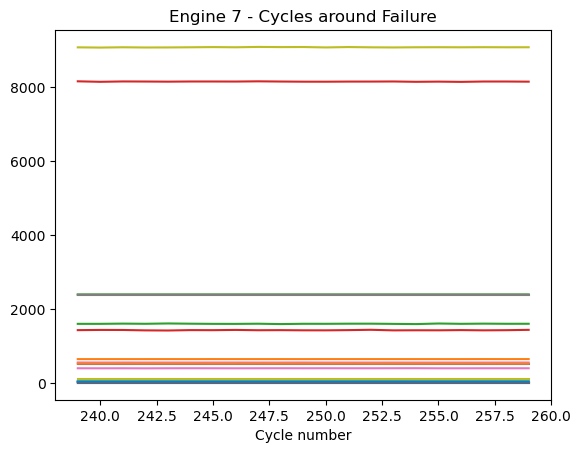

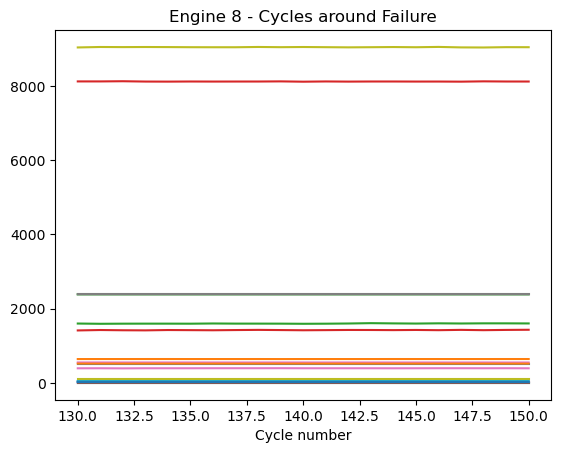

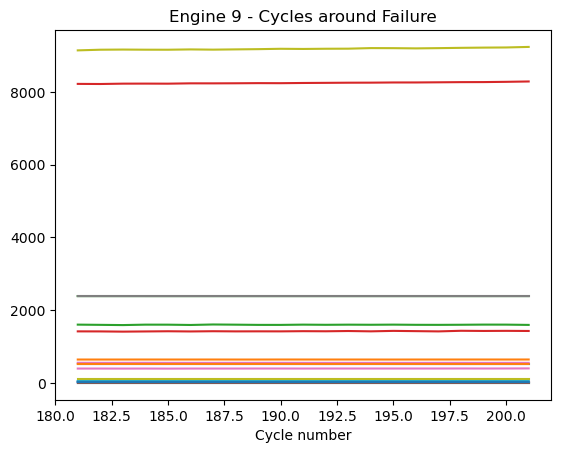

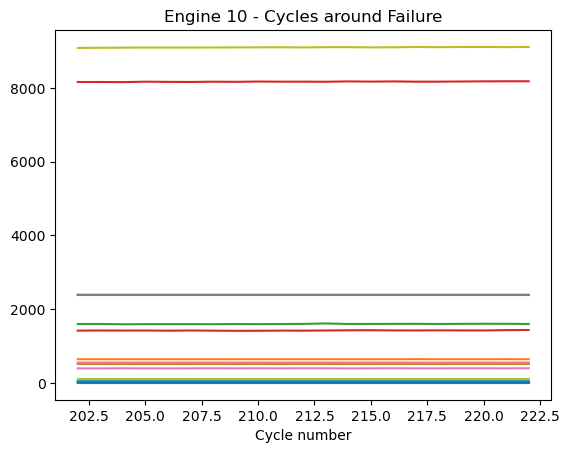

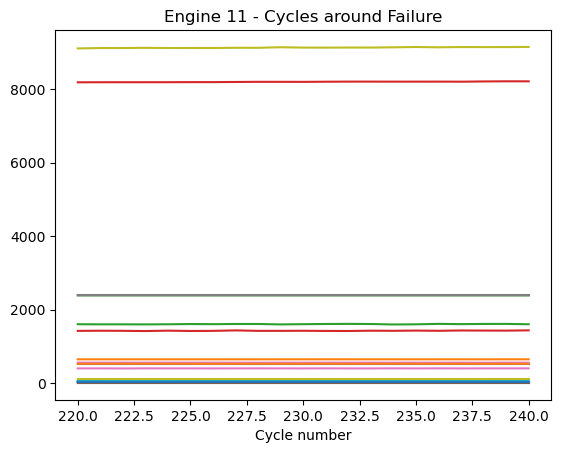

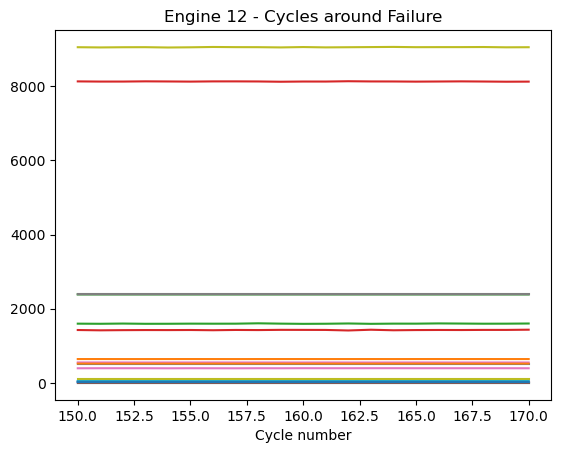

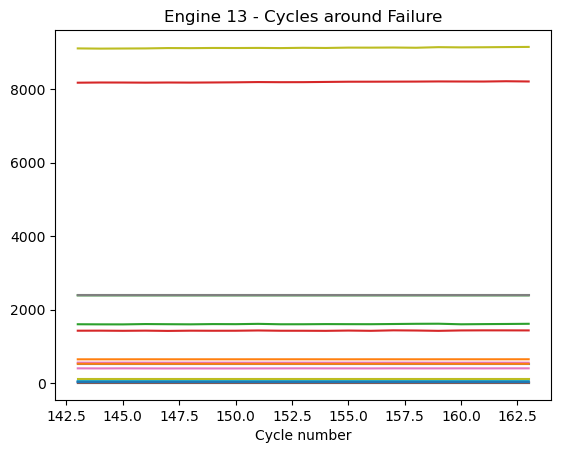

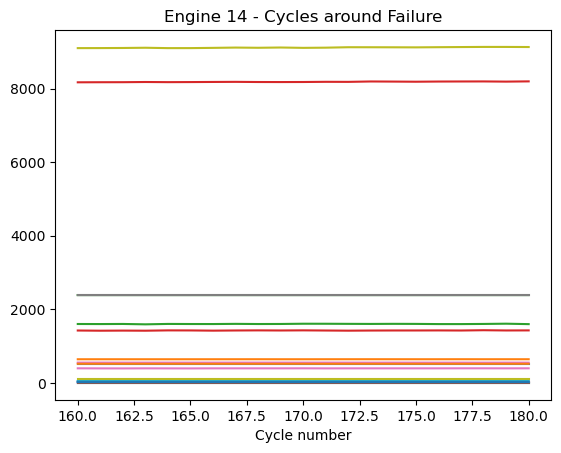

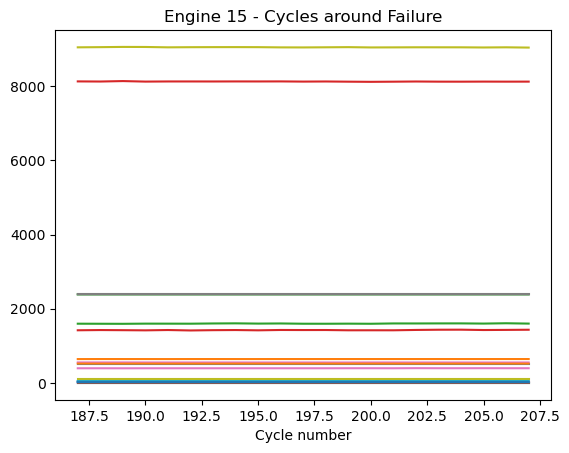

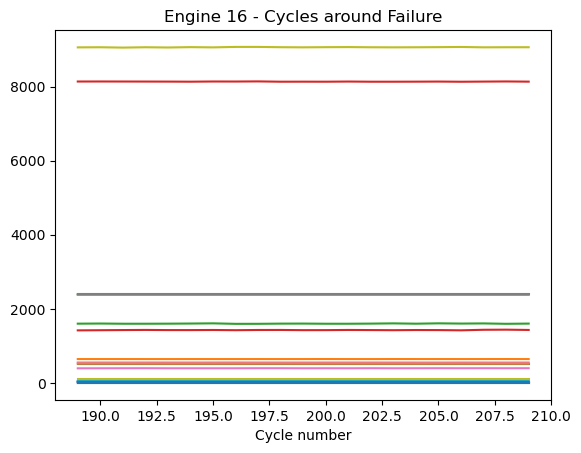

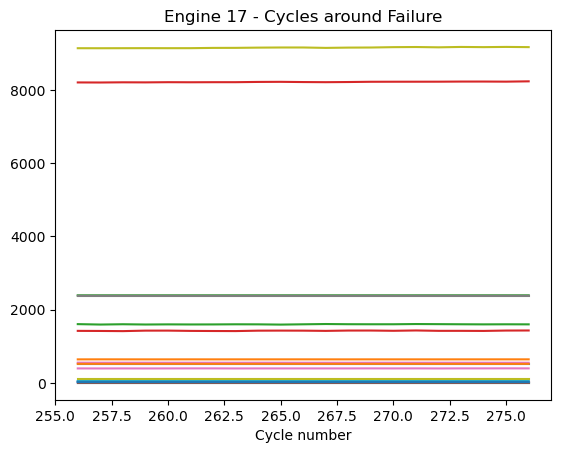

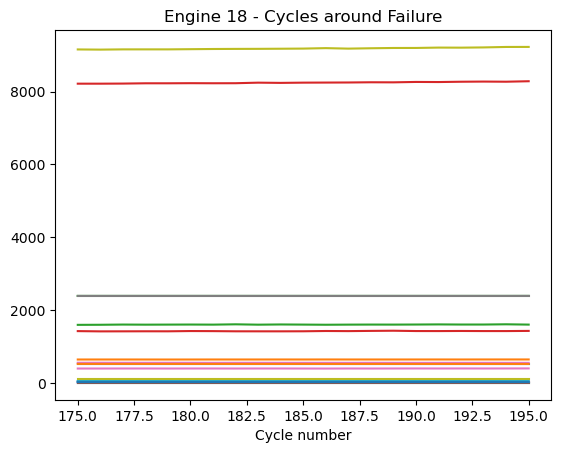

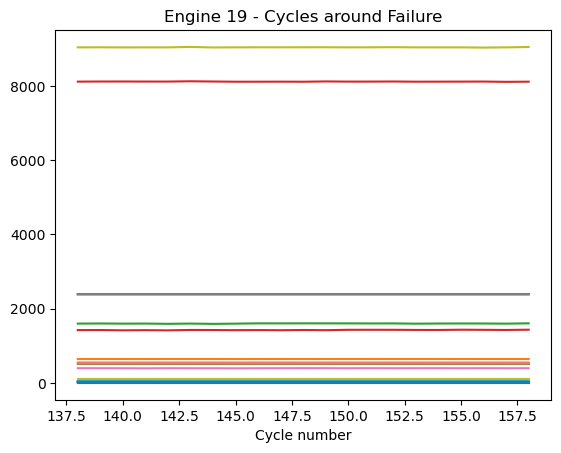

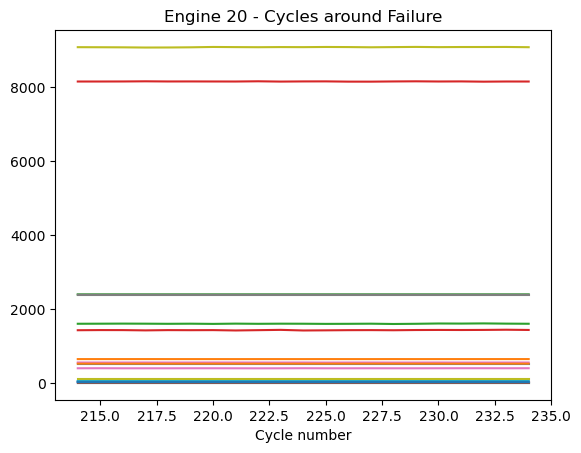

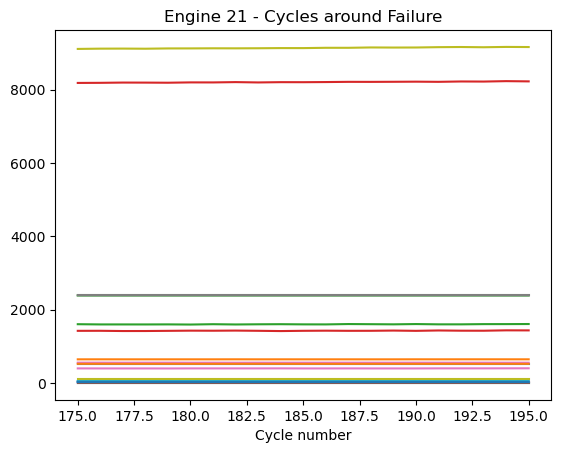

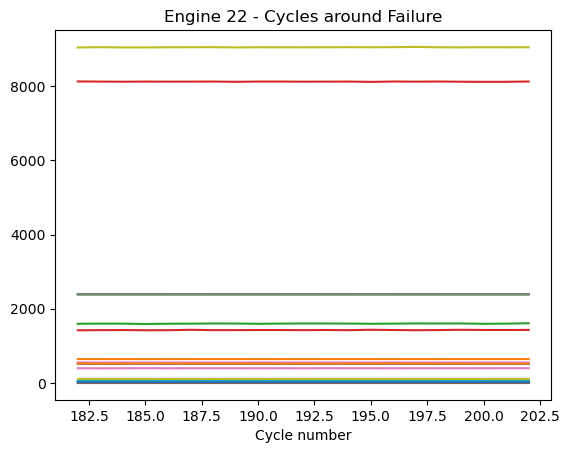

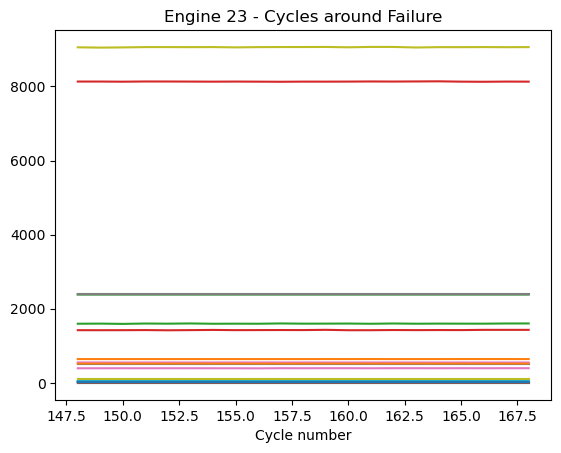

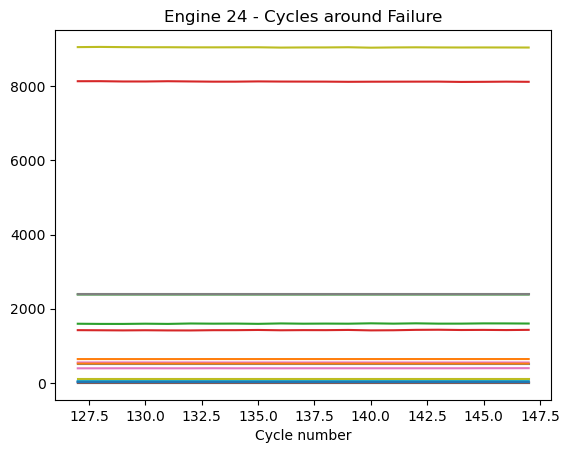

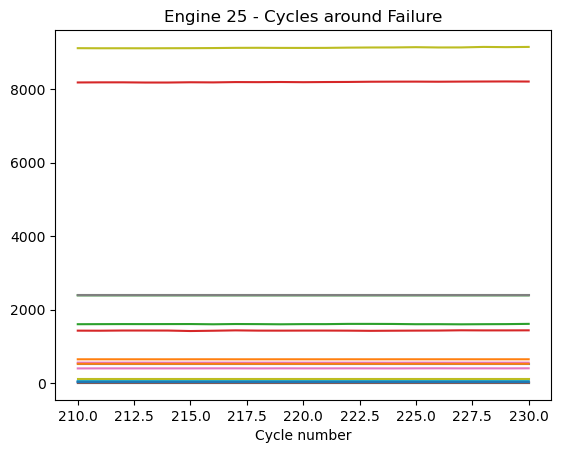

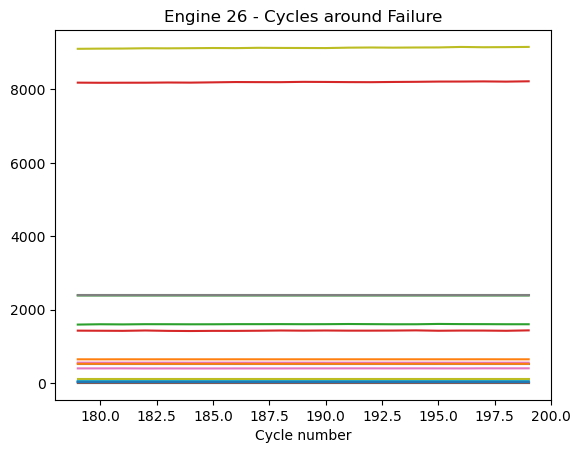

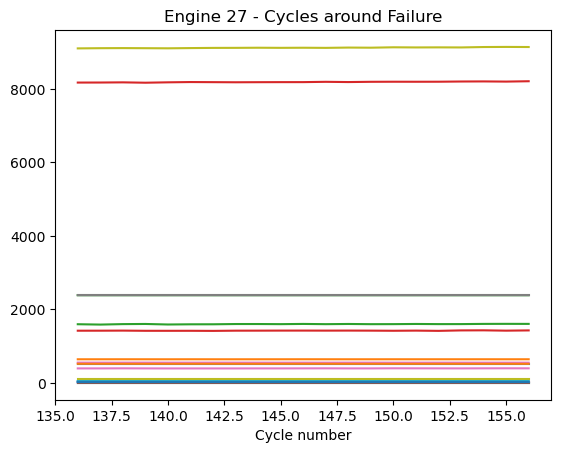

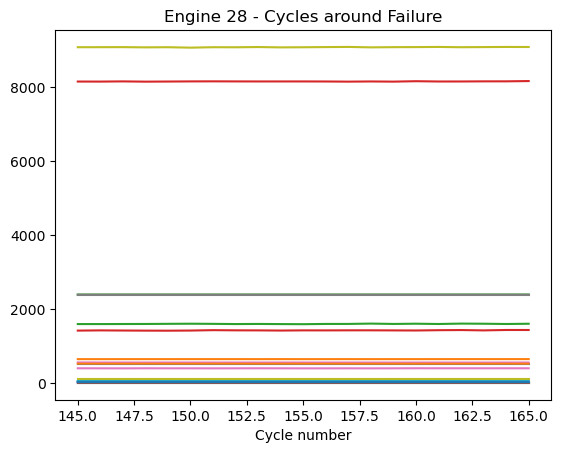

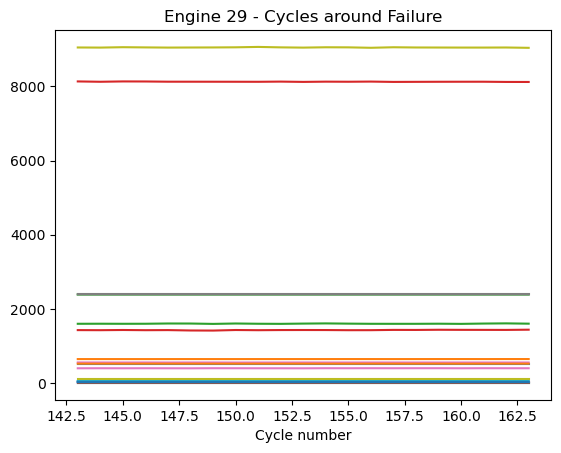

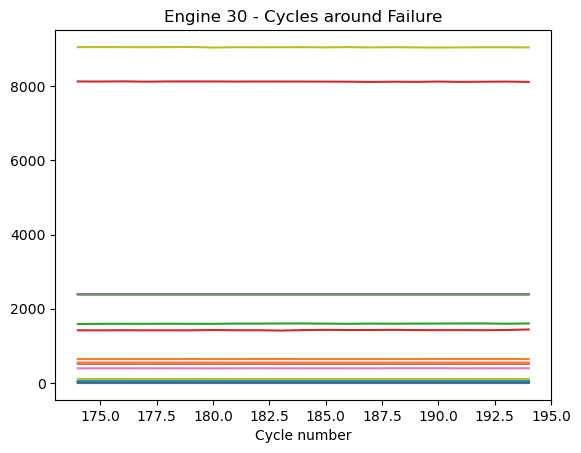

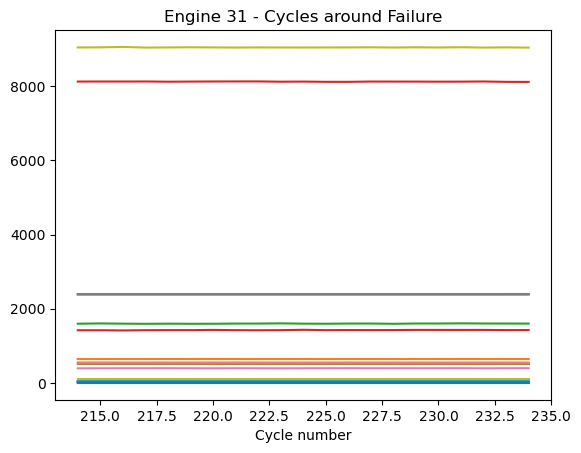

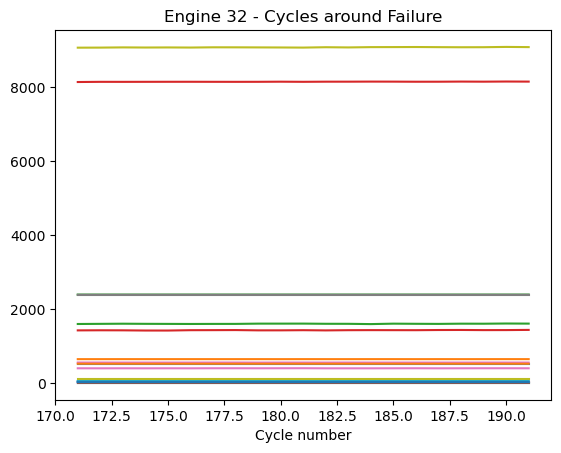

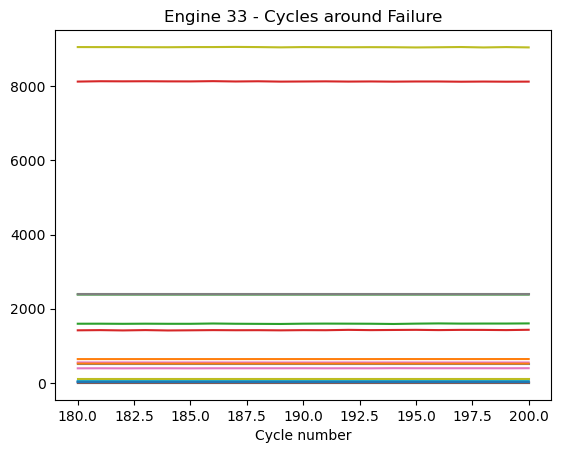

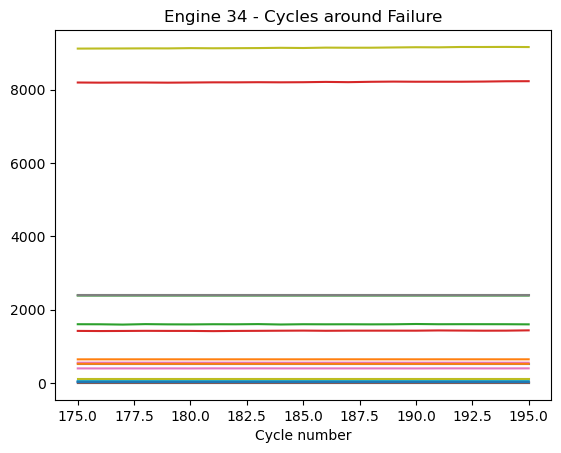

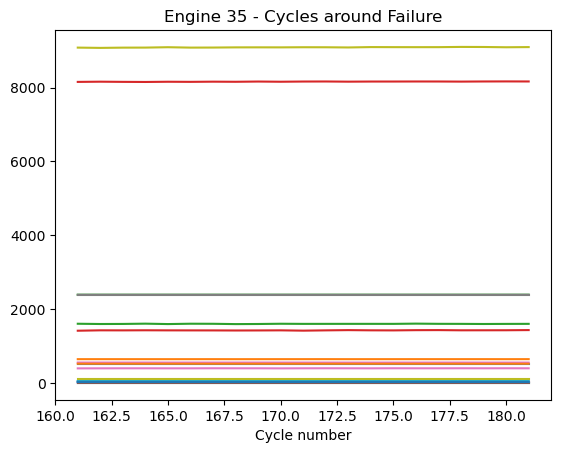

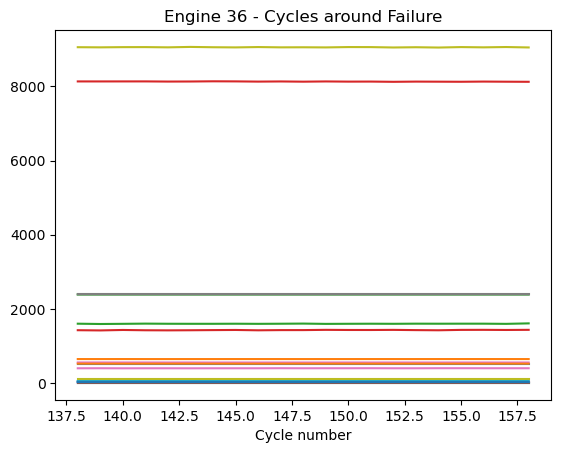

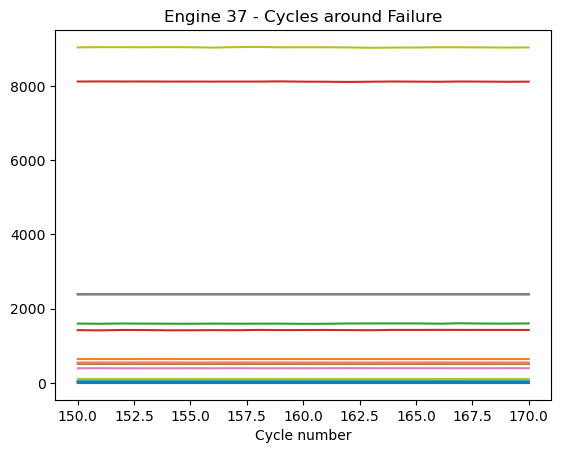

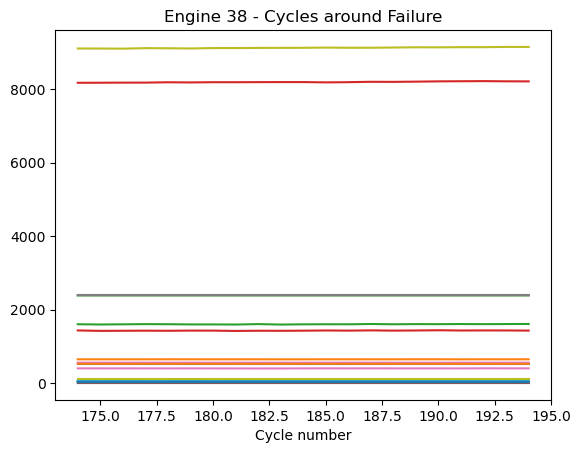

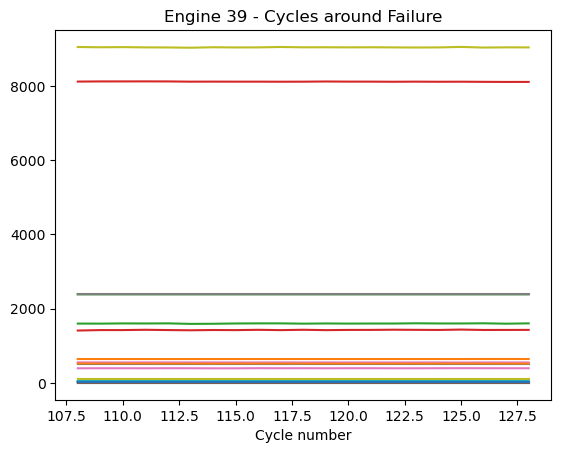

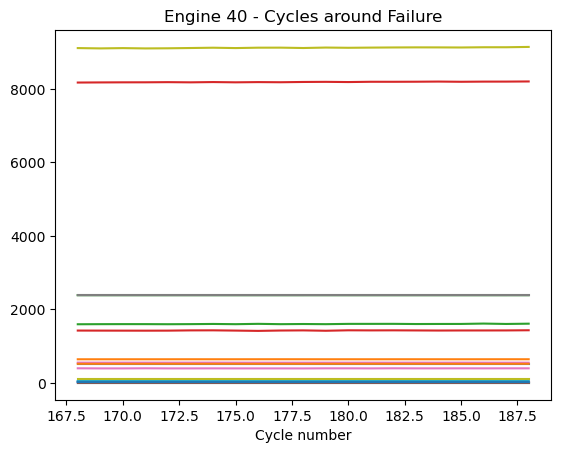

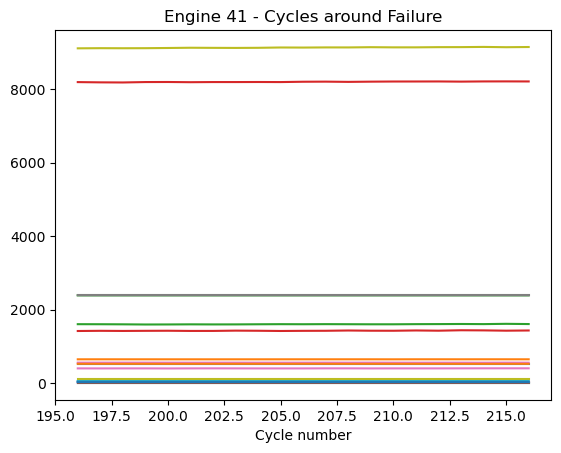

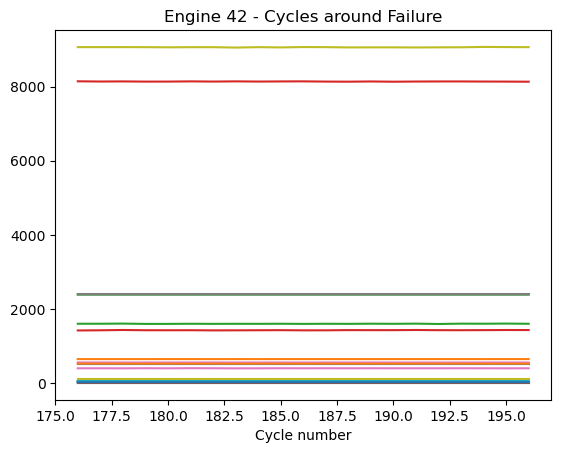

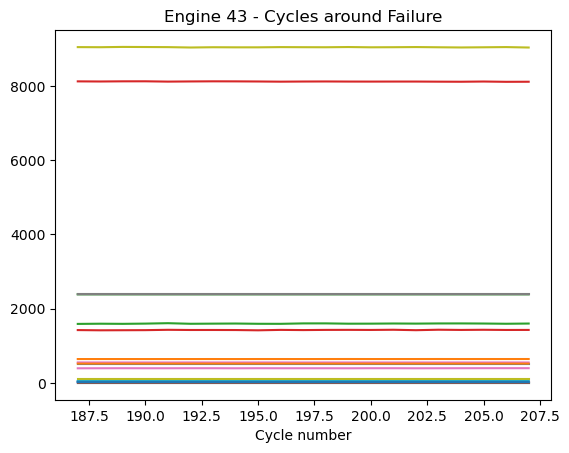

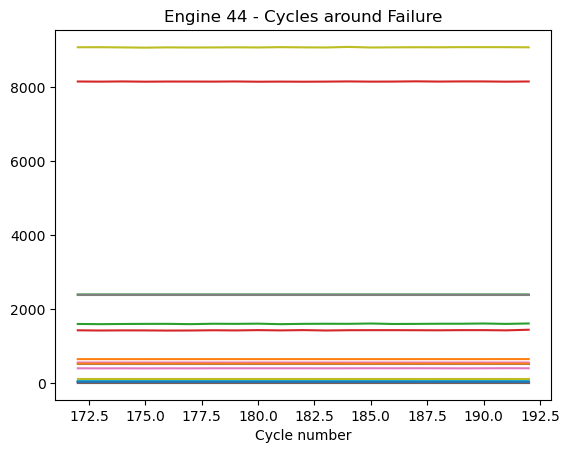

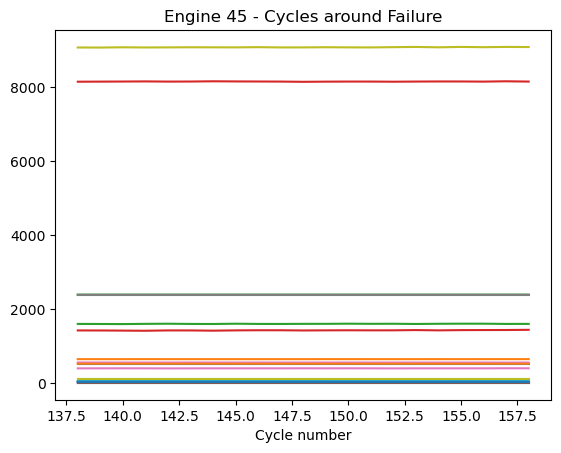

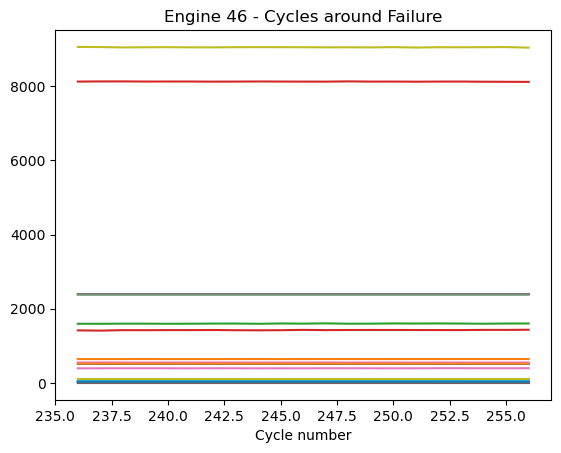

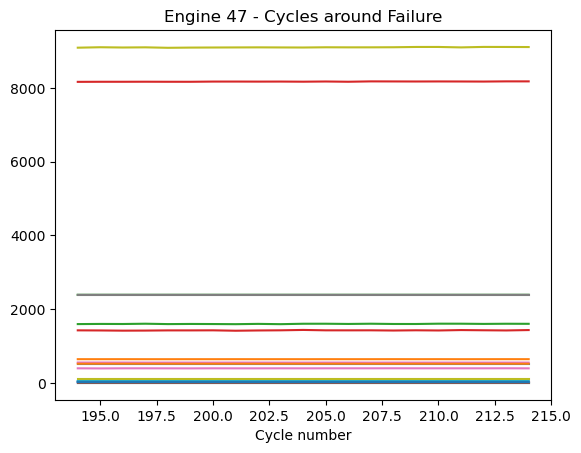

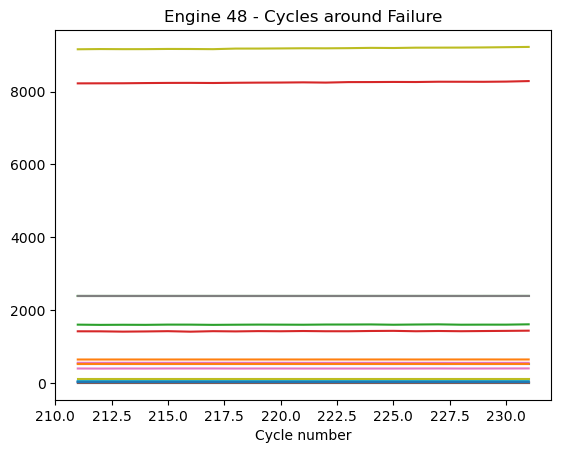

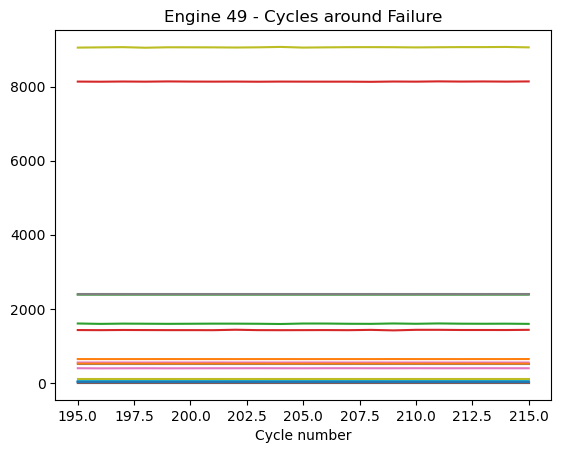

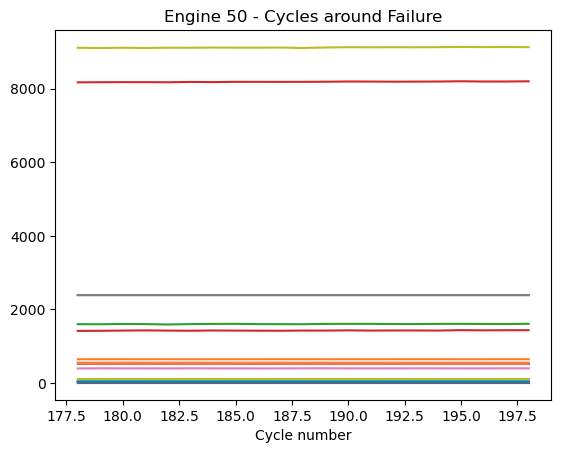

In [27]:
# Plot cycles at and near the failure cycle for each engine
for engine_id, failure_cycle in engine_failure_cycles.items():
    engine_data = train_data[train_data['Engine id'] == engine_id]
    window_size = 20  # Adjust window size as needed
    window_data = engine_data[(engine_data['Cycle number'] >= failure_cycle - window_size) & (engine_data['Cycle number'] <= failure_cycle + window_size)]
    window_data.plot(x='Cycle number', y=sensor_columns, title=f'Engine {engine_id} - Cycles around Failure', legend=False)
    plt.show()